In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
raw_data = pd.read_csv('spam.csv')

In [3]:
raw_data.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [4]:
raw_data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
raw_data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True, axis=1)

In [6]:
raw_data.head(3)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [7]:
raw_data = raw_data.rename({'v1': 'Class', 'v2': 'Sms'}, axis=1)

In [8]:
raw_data.head(3)

,Class,Sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [9]:
raw_data.nunique()

Class       2
Sms      5169
dtype: int64

In [10]:
#find duplicates

raw_data_duplicates = raw_data[raw_data.duplicated()]
raw_data_duplicates

,Class,Sms
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [11]:
#remove duplicates
raw_data.drop_duplicates()

,Class,Sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
#get the length each text message
raw_data['Length'] = raw_data['Sms'].apply(len)
raw_data.head(3)

,Class,Sms,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155


In [13]:
import seaborn as sns

C:\Users\Mariam Folasewa\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


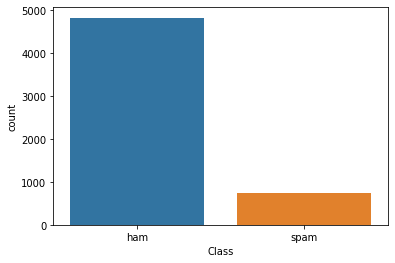

In [14]:
x = raw_data['Class'].value_counts()
sns.countplot(x = 'Class', data = raw_data)

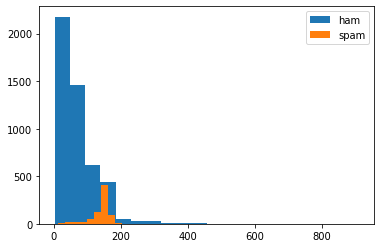

In [15]:
plt.hist(raw_data[raw_data['Class']=='ham']['Length'], bins=20)
plt.hist(raw_data[raw_data['Class']=='spam']['Length'], bins=10)
plt.legend(('ham', 'spam'))

In [16]:
#get all the ham and spam emails
spam_msg = raw_data[raw_data['Class']=='spam']
ham_msg = raw_data[raw_data['Class']=='ham']

In [17]:
#create a numpy list
spam_msg_txt = " ".join(spam_msg['Sms'].to_numpy().tolist())
ham_msg_txt = " ".join(ham_msg['Sms'].to_numpy().tolist())

In [18]:
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string,re

In [19]:
#generate a cloud mask
cloud_mask = np.array(Image.open('email logo.png'))
cloud_mask

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

In [20]:
#def transform_format(val):
  #  if val == 247:
 #       return 255
 #   else:
  #      return val
    
# Transform your mask into a new one 
#transformed_cloud_mask = np.ndarray((cloud_mask.shape[0],cloud_mask.shape[1]), np.int32)

#for i in range(len(cloud_mask)):
 #   transformed_cloud_mask[i] = list(map(transform_format, cloud_mask[i]))

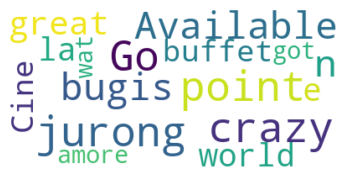

In [21]:
#text review
text = raw_data.Sms[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
#now let's combine the sms into one big word cloud

text = " ".join(review for review in raw_data.Sms)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 451656 words in the combination of all review.


**TEXTUAL DATA CLEANING**

In [23]:
#create a function to perform normalization techniques
#the normalization techniques are case normalization, stemming, remooving stop words
from nltk import stem

stemmer = stem.SnowballStemmer('english')

stop_words = set(stopwords.words('english'))

def msg_normalize(msg):
    msg = msg.lower()
    return msg

def alt_msg_reviews(msg):
    #remove stopwords
    msg = [word for word in msg.split() if word not in stop_words]
    msg = " ".join([stemmer.stem(word) for word in msg])
    return msg
    

In [24]:
#applying the functions
raw_data['Sms'] = raw_data['Sms'].apply(msg_normalize)


In [25]:
raw_data['Sms'] = raw_data['Sms'].apply(alt_msg_reviews)

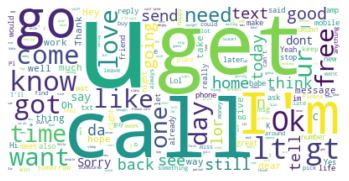

In [26]:
#generate a wordcloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)

# Display the generated image:

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [27]:
#generate a cloud mask
cloud_mask = np.array(Image.open('email logo.png'))
cloud_mask

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

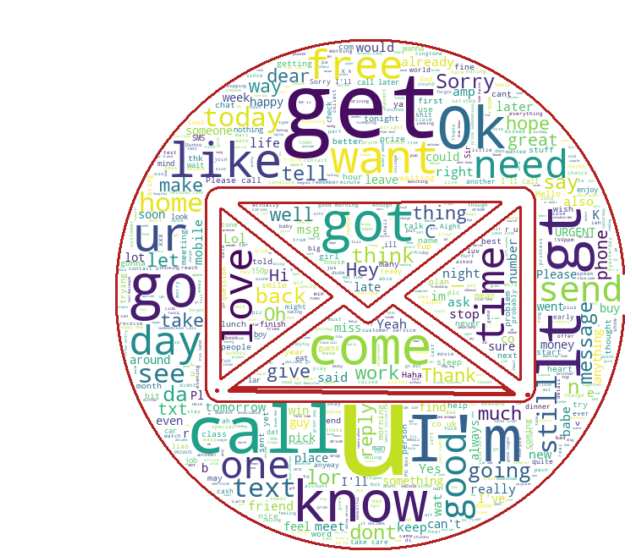

In [28]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=cloud_mask,
               stopwords=stop_words, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("sms_cloud.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


**Preprocessing Contd**

In [29]:
from string import punctuation
import re
from nltk import PorterStemmer
ps=PorterStemmer()

#function to remove punctuations

def remove_punctuation(msg):
    msg = "".join(a for a in msg if a not in punctuation)
    return msg

def tokenize(msg):
    msg = re.split('\W+', msg)
    return msg
def stop_word(msg):
    msg = [word for word in msg if word not in stop_words]
    return msg    


def stemming(msg):
    stemmed_msg=[ps.stem(char) for char in msg]
    return msg


In [30]:
#apply the functions above
raw_data['remove_punc']= raw_data['Sms'].apply(remove_punctuation)
raw_data['tokenized_row']=raw_data['remove_punc'].apply(lambda row:tokenize(row.lower()))
raw_data['remove_stopword']= raw_data['tokenized_row'].apply(stop_word)
raw_data['stemmed_text']=raw_data['remove_stopword'].apply(lambda char :stemming(char))


In [31]:
def final_msg(stemmed_msg):
    final_msg=" ".join(char for char in stemmed_msg)
    return final_msg

In [32]:
#applying the function
raw_data['final_text']=raw_data['stemmed_text'].apply(lambda x:final_msg(x))

In [33]:
raw_data.head(3)

,Class,Sms,Length,remove_punc,tokenized_row,remove_stopword,stemmed_text,final_text
0,ham,"go jurong point, crazy.. avail bugi n great wo...",111,go jurong point crazy avail bugi n great world...,"[go, jurong, point, crazy, avail, bugi, n, gre...","[go, jurong, point, crazy, avail, bugi, n, gre...","[go, jurong, point, crazy, avail, bugi, n, gre...",go jurong point crazy avail bugi n great world...
1,ham,ok lar... joke wif u oni...,29,ok lar joke wif u oni,"[ok, lar, joke, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joke, wif, u, oni]",ok lar joke wif u oni
2,spam,free entri 2 wkli comp win fa cup final tkts 2...,155,free entri 2 wkli comp win fa cup final tkts 2...,"[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...",free entri 2 wkli comp win fa cup final tkts 2...


In [34]:
raw_data.drop(['remove_punc', 'tokenized_row', 'stemmed_text', 'remove_stopword'], axis=1, inplace=True)
raw_data.head()

,Class,Sms,Length,final_text
0,ham,"go jurong point, crazy.. avail bugi n great wo...",111,go jurong point crazy avail bugi n great world...
1,ham,ok lar... joke wif u oni...,29,ok lar joke wif u oni
2,spam,free entri 2 wkli comp win fa cup final tkts 2...,155,free entri 2 wkli comp win fa cup final tkts 2...
3,ham,u dun say earli hor... u c alreadi say...,49,u dun say earli hor u c alreadi say
4,ham,"nah think goe usf, live around though",61,nah think goe usf live around though


**Data Modelling**

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

X = raw_data.drop(['Class'], axis=1)
y = raw_data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#introducing the vectorizer
cv=CountVectorizer(max_features=500)
temp_train=cv.fit_transform(X_train['final_text']).toarray()
temp_test=cv.transform(X_test['final_text']).toarray()

tf=TfidfTransformer()
temp_train=tf.fit_transform(temp_train)
temp_test=tf.transform(temp_test)

temp_train=pd.DataFrame(temp_train.toarray(),index=X_train.index)
temp_test=pd.DataFrame(temp_test.toarray(),index=X_test.index)
X_train=pd.concat([X_train,temp_train],axis=1,sort=False)
X_test=pd.concat([X_test,temp_test],axis=1,sort=False)

In [36]:
X_train.head(3)

,Sms,Length,final_text,0,1,2,3,4,5,6,...,490,491,492,493,494,495,496,497,498,499
4089,tri call repli sms video mobil 750 min unlimit...,135,tri call repli sms video mobil 750 min unlimit...,0.333881,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5426,oh yeah! diet flew window,45,oh yeah diet flew window,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.726323,0.0,0.0,0.0,0.0,0.0,0.0
1336,"sweet, may may go 4u meet carlo gaug patti int...",82,sweet may may go 4u meet carlo gaug patti inte...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
X_train.drop(['Sms','final_text'],axis=1,inplace=True)
X_test.drop(['Sms','final_text'],axis=1,inplace=True)
X_train.head()

,Length,0,1,2,3,4,5,6,7,8,...,490,491,492,493,494,495,496,497,498,499
4089,135,0.333881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5426,45,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.726323,0.0,0.0,0.0,0.0,0.0,0.0
1336,82,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4061,67,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1385,115,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
#introduce the classifiers and selecting the best
from sklearn import svm
svm = svm.SVC(C=1000)
svm.fit(X_train, y_train)

from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)

from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [41]:
#predicting and checking accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#for svm
y_pred = svm.predict(X_test)

#decision tree
y_pred1 = DTC.predict(X_test)

#random forest
y_pred2 = RFC.predict(X_test)

#Accuracy scores
print("Accuracy_Score using svm:",accuracy_score(y_test,y_pred))
print("Accuracy_Score using decision tree:",accuracy_score(y_test,y_pred1))
print("Accuracy_Score using random forest:",accuracy_score(y_test,y_pred2))

#Confusion matrices
print("Confusion Matrix using svm:", confusion_matrix(y_test, y_pred))

print("Confusion Matrix using decision tree:", confusion_matrix(y_test, y_pred1))

print("Confusion Matrix using random forest:", confusion_matrix(y_test, y_pred2))



Accuracy_Score using svm: 0.9791816223977028
Accuracy_Score using decision tree: 0.9612347451543432
Accuracy_Score using random forest: 0.9842067480258435
Confusion Matrix using svm: [[1233    4]
 [  25  131]]
Confusion Matrix using decision tree: [[1202   35]
 [  19  137]]
Confusion Matrix using random forest: [[1233    4]
 [  18  138]]


In [48]:
#comparison with predicted values
df=pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df

,Actual,Predicted
4833,ham,ham
47,ham,ham
4083,ham,ham
1540,ham,ham
5260,ham,ham
...,...,...
2175,ham,ham
1248,ham,ham
1400,ham,ham
1040,ham,ham
